<a href="https://colab.research.google.com/github/Mmbsaksd/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#**Data Preprocessing**

In [1]:
#importing the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing datetime moduel
import datetime

#importing warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading the datasets
df = pd.read_csv('/content/drive/MyDrive/Data Sets/SeoulBikeData.csv', encoding= 'unicode_escape')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
#Checking the type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
#Checking the null value
df.isnull().sum().sort_values(ascending=False)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [6]:
df.shape

(8760, 14)

**Observation on Preprocessing**

*   There are no null value in datasets
*   Some object value are there
*   Shape of the datasets is (8760, 14)
*   Here we can find time stamp



#**Feature Engineering**

In [7]:
#Extracting month from given datasets
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df['Week'] = df['Date'].dt.dayofweek

#Groupping the data based on day, week, month and year
day = pd.DataFrame(df['Day'].value_counts()).sort_index()
month = pd.DataFrame(df['Month'].value_counts()).sort_index()
year = pd.DataFrame(df['Year'].value_counts()).sort_index()
week = pd.DataFrame(df['Week'].value_counts()).sort_index()

In [8]:
#Converting categorical variable into numeric
ohd = pd.get_dummies(df, columns=['Holiday','Seasons','Functioning Day'])
ohd.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Day,Week,Holiday_Holiday,Holiday_No Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Functioning Day_No,Functioning Day_Yes
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,12,3,0,1,0,0,0,1,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,12,3,0,1,0,0,0,1,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,12,3,0,1,0,0,0,1,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,12,3,0,1,0,0,0,1,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,12,3,0,1,0,0,0,1,0,1


In [9]:
ohd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Month                      8760 non-null   int64         
 12  Year  

#**Explorative Data Analysis**

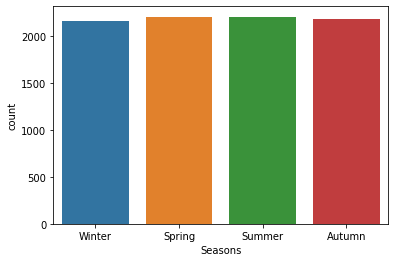

In [10]:
sns.countplot(x='Seasons', data=df)

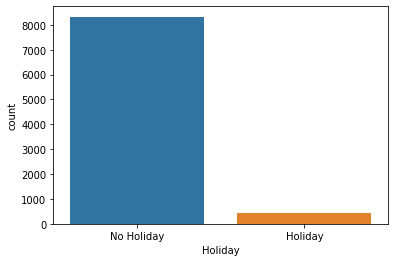

In [11]:
sns.countplot(x='Holiday', data = df)

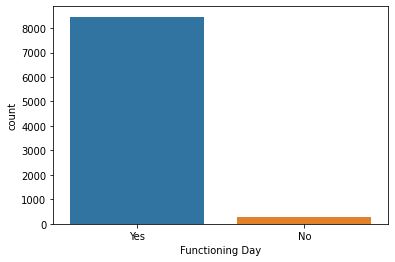

In [12]:
sns.countplot(x='Functioning Day', data=df)

In [13]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Year', 'Day', 'Week'],
      dtype='object')

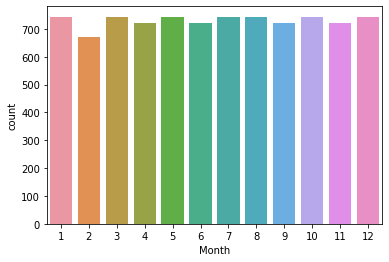

In [14]:
sns.countplot(x= 'Month', data = df)

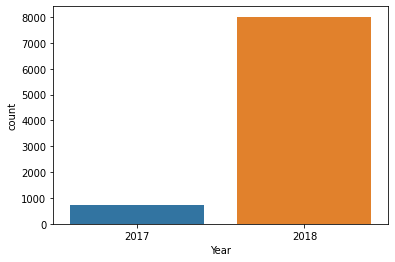

In [15]:
sns.countplot(x='Year', data = df)

In [16]:
df['Week'].value_counts()

6    1296
2    1272
1    1272
3    1248
5    1248
4    1224
0    1200
Name: Week, dtype: int64

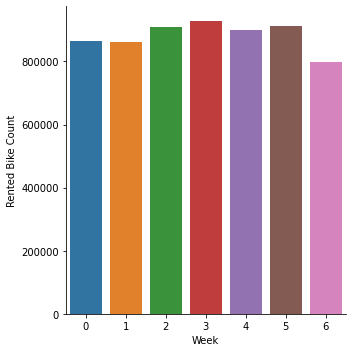

In [17]:
data_wk = df.groupby(['Week'], as_index=False)['Rented Bike Count'].sum()

sns.catplot(data = data_wk, x='Week', y= 'Rented Bike Count', kind = 'bar')

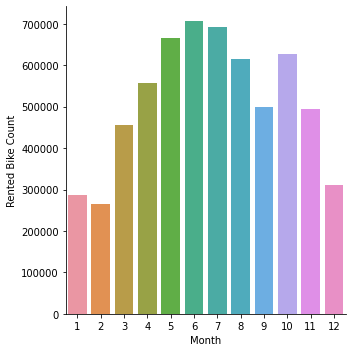

In [18]:
data_mn = df.groupby(['Month'], as_index=False)['Rented Bike Count'].sum()

sns.catplot(data=data_mn, x='Month', y='Rented Bike Count', kind='bar')

[]

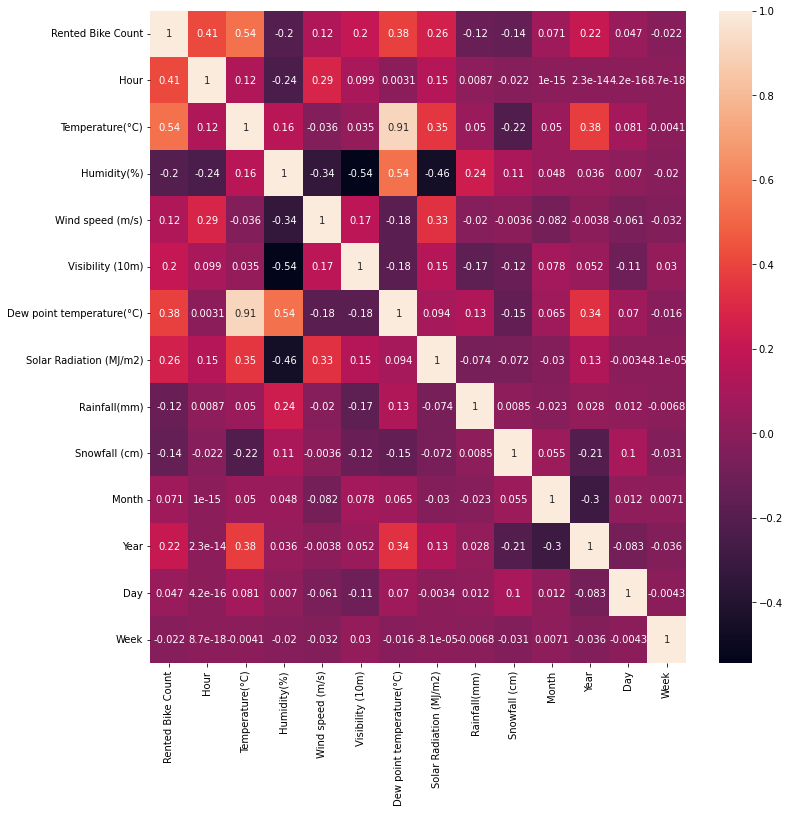

In [19]:
corr = df[['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']]
m = corr.corr()

plt.figure(figsize=(12,12))
sns.heatmap(data = df.corr(), annot=True)
plt.plot()

#**Model Building**

##**Model Preprocessing**

In [20]:
#Feature selection
x = corr.drop(columns='Rented Bike Count')
y = corr['Rented Bike Count']

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [22]:
ytrain.head()

8415     995
5049    1195
8395    1448
1535     178
5518    1980
Name: Rented Bike Count, dtype: int64

##**Linear Regression**

In [23]:
#Loading the model and traning
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain, ytrain)

#Predicting with train model
yp_lr_train = lr.predict(xtrain)
yp_lr_test = lr.predict(xtest)

#Evaluating the model
from sklearn.metrics import mean_absolute_error
yp_lr_train_cr = mean_absolute_error(ytrain,yp_lr_train)
yp_lr_test_cr = mean_absolute_error(ytest, yp_lr_test)

#Printing the result of Evaluation
print("Train score: ",yp_lr_train_cr)
print("Test score: ",yp_lr_test_cr)


Train score:  347.0838839468024
Test score:  349.2802235949099


##**Lasso**

In [24]:
#Loading the model and traning
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(xtrain,ytrain)

#predicting with train model
yp_ls_train = ls.predict(xtrain)
yp_ls_test = ls.predict(xtest)

#Evaluating the model
yp_ls_train_mae = mean_absolute_error(ytrain, yp_ls_train)
yp_ls_test_mae = mean_absolute_error(ytest, yp_ls_test)

#Print the Evaluation Result
print("Train score:",yp_ls_train_mae)
print("Test score :",yp_ls_test_mae)

Train score: 346.9682306273913
Test score : 349.24285963835234


##**Ridge**

In [28]:
#Loading Ridge and traning the model
from sklearn.linear_model import Ridge
rd = Ridge()
rd.fit(xtrain,ytrain)

#predicting with train model
yp_rd_train = rd.predict(xtrain)
yp_rd_test = rd.predict(xtest)

#Evaluating the model
yp_rd_train_mae = mean_absolute_error(ytrain, yp_rd_train)
yp_rd_test_mae = mean_absolute_error(ytest, yp_rd_test)

#Print the Evaluation Result
print("Train score:",yp_rd_train_mae)
print("Test score :",yp_rd_test_mae)

Train score: 347.0825200753625
Test score : 349.2789551611158


##**Decision Tree Regressor**

In [26]:
#Loading Decision Tree Regressor and traning the model
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(xtrain,ytrain)

#predicting with train model
yp_dt_train = dt.predict(xtrain)
yp_dt_test = dt.predict(xtest)

#Evaluating the model
yp_dt_train_mae = mean_absolute_error(ytrain, yp_dt_train)
yp_dt_test_mae = mean_absolute_error(ytest, yp_dt_test)

#Print the Evaluation Result
print("Train score:",yp_dt_train_mae)
print("Test score :",yp_dt_test_mae)

Train score: 0.0
Test score : 251.09760273972603


##**Random Forest Regressor**

In [27]:
#Loading Random Forest Regressor and traning the model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)

#predicting with train model
yp_rf_train = rf.predict(xtrain)
yp_rf_test = rf.predict(xtest)

#Evaluating the model
yp_rf_train_mae = mean_absolute_error(ytrain, yp_rf_train)
yp_rf_test_mae = mean_absolute_error(ytest, yp_rf_test)

#Print the Evaluation Result
print("Train score:",yp_rf_train_mae)
print("Test score :",yp_rf_test_mae)

Train score: 69.19457905251141
Test score : 184.01257990867583


##**XGBoost Regressor**

In [29]:
#Loading Ridge and traning the model
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(xtrain,ytrain)

#predicting with train model
yp_xg_train = xg.predict(xtrain)
yp_xg_test = xg.predict(xtest)

#Evaluating the model
yp_xg_train_mae = mean_absolute_error(ytrain, yp_xg_train)
yp_xg_test_mae = mean_absolute_error(ytest, yp_xg_test)

#Print the Evaluation Result
print("Train score:",yp_xg_train_mae)
print("Test score :",yp_xg_test_mae)

[23:26:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score: 196.8335537300254
Test score : 204.97170560346007


##**Support Vector Regressor**

In [30]:
#Loading Ridge and traning the model
from sklearn.svm import SVR
svr = SVR()
svr.fit(xtrain,ytrain)

#predicting with train model
yp_svr_train = svr.predict(xtrain)
yp_svr_test = svr.predict(xtest)

#Evaluating the model
yp_svr_train_mae = mean_absolute_error(ytrain, yp_svr_train)
yp_svr_test_mae = mean_absolute_error(ytest, yp_svr_test)

#Print the Evaluation Result
print("Train score:",yp_svr_train_mae)
print("Test score :",yp_svr_test_mae)

Train score: 488.77931891629225
Test score : 488.899614383826


##**Model Selection**

In [31]:
#Importing the evaluation metrics packages
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from math import sqrt

In [50]:
#Building the function on aggregating the result on table

models = [lr, ls, rd, dt, rf, xg, svr]

def model_metrics(model, xtrain, xtest, ytrain, ytest):
  cols = ['Train MAE','Test MAE','Train RMSE','Test RMSE','Train R2 Square','Test R2 Square']
  model_df = pd.DataFrame(columns=cols)

  i = 0
  for model in models:
    model.fit(xtrain,ytrain)
    y_pred_train = model.predict(xtrain)
    y_pred_test = model.predict(xtest)

    model_df.loc[i,'Train MAE'] = mean_absolute_error(y_pred_train,ytrain).round(2)
    model_df.loc[i,'Test MAE'] = mean_absolute_error(y_pred_test,ytest).round(2)
    model_df.loc[i, 'Train RMSE'] = sqrt(mean_absolute_error(y_pred_train, ytrain).round(2))
    model_df.loc[i, 'Test RMSE'] = sqrt(mean_squared_error(y_pred_test, ytest).round(2))
    model_df.loc[i, 'Train R2 Square'] = r2_score(y_pred_train,ytrain)
    model_df.loc[i, 'Test R2 Square'] = r2_score(y_pred_test, ytest)

    i = i+1

  return model_df

In [51]:
model = {'Model':['Linear Regression','Lasso','Ridge','Decission Tree','Random Forest','XGBoost',"SVR"]}
model_id = pd.DataFrame(model)
model_result = model_metrics(models,xtrain,xtest,ytrain,ytest)
result_model = pd.concat([model_id, model_result],axis=1)
result_table = result_model.set_index('Model')
result_table

[01:32:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Train MAE,Test MAE,Train RMSE,Test RMSE,Train R2 Square,Test R2 Square
Model,,,,,,
Linear Regression,347.08,349.28,18.630083,472.102447,-0.119524,-0.123017
Lasso,346.97,349.24,18.627131,472.108356,-0.122201,-0.126516
Ridge,347.08,349.28,18.630083,472.102256,-0.119543,-0.123041
Decission Tree,0.0,250.26,0.0,426.385858,1.0,0.546524
Random Forest,69.39,183.87,8.330066,309.303136,0.962354,0.689288
XGBoost,196.83,204.97,14.029612,324.888596,0.666731,0.626474
SVR,488.78,488.9,22.108369,661.645759,-56.759566,-60.263033


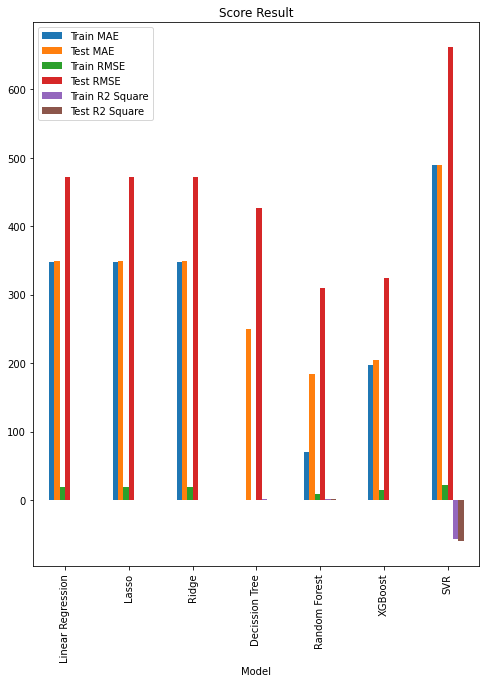

In [52]:
#Plotting the graphical representation of result
result_model.plot(x = 'Model', y = ['Train MAE','Test MAE','Train RMSE','Test RMSE','Train R2 Square','Test R2 Square'], kind='bar',title='Score Result', figsize=(8,10))

#**Feature Importance**

In [54]:
#Installing the shap package
!pip install Shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 8.1 MB/s 


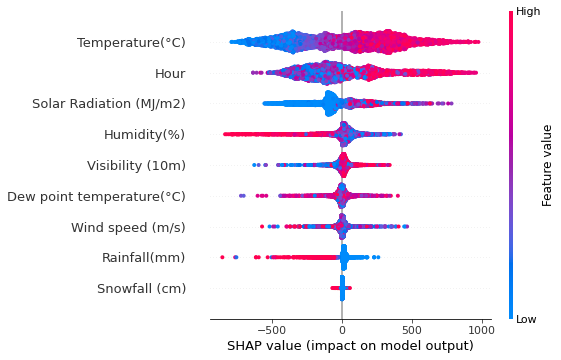

In [55]:
#implimenting the shap explainer on Decision Tree
import shap
shap.initjs

explainer_train_dt = shap.TreeExplainer(dt)
shap_values_train_dt = explainer_train_dt(xtrain)
shap.summary_plot(shap_values_train_dt, plot_type = 'dot')

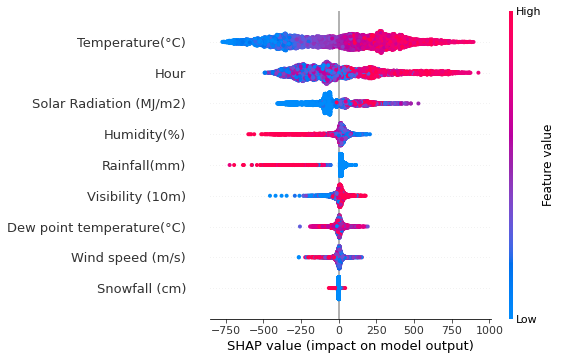

In [56]:
explainer_train_rf = shap.TreeExplainer(rf)
shap_values_train_rf = explainer_train_rf(xtrain)
shap.summary_plot(shap_values_train_rf, plot_type = 'dot')

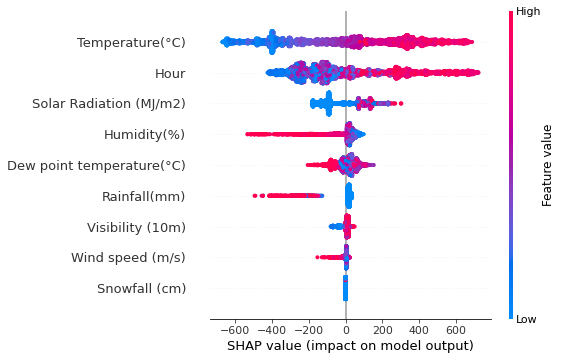

In [58]:
explainer_train_xg = shap.TreeExplainer(xg)
shap_values_train_xg = explainer_train_xg(xtrain)
shap.summary_plot(shap_values_train_xg, plot_type = 'dot')